# Import libaries

In [1]:
from tqdm import tqdm
import pickle
from imutils import paths
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, utils
from tensorflow.keras.models import Model
from tensorflow.keras.applications import ResNet50

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns





# Load pretrained model

In [2]:
CATEGORIES = ['heart', 'oblong', 'oval', 'round', 'square']
epochs=50
batch_size = 32
IMG_SIZE = 224

In [3]:
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)
baseModel = ResNet50(input_shape=IMG_SHAPE,
              include_top=True,
              weights='imagenet')
baseModel.trainable = False

102967424/102967424 [==============================] - 1s 0us/step


In [4]:
layerAvgPool  = Model(inputs=baseModel.input, outputs=baseModel.get_layer('avg_pool').output)

# Load dataset

In [5]:
trainDS = utils.image_dataset_from_directory(
    '/content/drive/MyDrive/CS331/data/train',
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=batch_size,
    color_mode='rgb',
)

testDS = utils.image_dataset_from_directory(
    '/content/drive/MyDrive/CS331/data/test',
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=batch_size,
    color_mode='rgb',
)

Found 4000 files belonging to 5 classes.
Found 1000 files belonging to 5 classes.


# Feature Extraction

In [6]:
image = np.zeros((1,2048))
label = np.zeros((1))
for i, (inputsBatch, labelsBatch) in tqdm(enumerate(trainDS)):
  features_batch = layerAvgPool.predict(inputsBatch)
  image = np.concatenate((image, features_batch), axis = 0)
  label = np.concatenate((label,labelsBatch), axis = 0)

0it [00:00, ?it/s]

1/1 [==============================] - 9s 9s/step


1it [00:48, 48.41s/it]

1/1 [==============================] - 0s 36ms/step


2it [00:52, 22.32s/it]

1/1 [==============================] - 0s 36ms/step


3it [00:56, 13.90s/it]

1/1 [==============================] - 0s 35ms/step


4it [00:59,  9.71s/it]

1/1 [==============================] - 0s 35ms/step


5it [01:03,  7.55s/it]

1/1 [==============================] - 0s 35ms/step


6it [01:06,  6.15s/it]

1/1 [==============================] - 0s 35ms/step


7it [01:10,  5.39s/it]

1/1 [==============================] - 0s 34ms/step


8it [01:14,  4.84s/it]

1/1 [==============================] - 0s 36ms/step


9it [01:18,  4.58s/it]

1/1 [==============================] - 0s 38ms/step


10it [01:21,  4.12s/it]

1/1 [==============================] - 0s 35ms/step


11it [01:24,  3.95s/it]

1/1 [==============================] - 0s 39ms/step


12it [01:28,  3.96s/it]

1/1 [==============================] - 0s 31ms/step


13it [01:31,  3.66s/it]

1/1 [==============================] - 0s 32ms/step


14it [01:34,  3.42s/it]

1/1 [==============================] - 0s 30ms/step


15it [01:38,  3.54s/it]

1/1 [==============================] - 0s 32ms/step


16it [01:42,  3.53s/it]

1/1 [==============================] - 0s 31ms/step


17it [01:45,  3.53s/it]

1/1 [==============================] - 0s 31ms/step


18it [01:48,  3.42s/it]

1/1 [==============================] - 0s 33ms/step


19it [01:51,  3.30s/it]

1/1 [==============================] - 0s 31ms/step


20it [01:55,  3.44s/it]

1/1 [==============================] - 0s 30ms/step


21it [01:59,  3.67s/it]

1/1 [==============================] - 0s 31ms/step


22it [02:03,  3.64s/it]

1/1 [==============================] - 0s 31ms/step


23it [02:06,  3.53s/it]

1/1 [==============================] - 0s 34ms/step


24it [02:09,  3.29s/it]

1/1 [==============================] - 0s 31ms/step


25it [02:12,  3.39s/it]

1/1 [==============================] - 0s 29ms/step


26it [02:16,  3.38s/it]

1/1 [==============================] - 0s 30ms/step


27it [02:19,  3.35s/it]

1/1 [==============================] - 0s 30ms/step


28it [02:22,  3.34s/it]

1/1 [==============================] - 0s 30ms/step


29it [02:25,  3.26s/it]

1/1 [==============================] - 0s 31ms/step


30it [02:28,  3.19s/it]

1/1 [==============================] - 0s 35ms/step


31it [02:32,  3.42s/it]

1/1 [==============================] - 0s 35ms/step


32it [02:36,  3.51s/it]

1/1 [==============================] - 0s 30ms/step


33it [02:39,  3.31s/it]

1/1 [==============================] - 0s 36ms/step


34it [02:43,  3.62s/it]

1/1 [==============================] - 0s 32ms/step


35it [02:47,  3.76s/it]

1/1 [==============================] - 0s 30ms/step


36it [02:51,  3.57s/it]

1/1 [==============================] - 0s 30ms/step


37it [02:54,  3.45s/it]

1/1 [==============================] - 0s 35ms/step


38it [02:58,  3.64s/it]

1/1 [==============================] - 0s 31ms/step


39it [03:01,  3.50s/it]

1/1 [==============================] - 0s 30ms/step


40it [03:04,  3.43s/it]

1/1 [==============================] - 0s 32ms/step


41it [03:08,  3.66s/it]

1/1 [==============================] - 0s 30ms/step


42it [03:12,  3.59s/it]

1/1 [==============================] - 0s 33ms/step


43it [03:16,  3.71s/it]

1/1 [==============================] - 0s 33ms/step


44it [03:20,  3.70s/it]

1/1 [==============================] - 0s 31ms/step


45it [03:22,  3.44s/it]

1/1 [==============================] - 0s 32ms/step


46it [03:26,  3.42s/it]

1/1 [==============================] - 0s 31ms/step


47it [03:30,  3.60s/it]

1/1 [==============================] - 0s 32ms/step


48it [03:33,  3.37s/it]

1/1 [==============================] - 0s 33ms/step


49it [03:36,  3.51s/it]

1/1 [==============================] - 0s 38ms/step


50it [03:40,  3.51s/it]

1/1 [==============================] - 0s 32ms/step


51it [03:43,  3.49s/it]

1/1 [==============================] - 0s 33ms/step


52it [03:47,  3.43s/it]

1/1 [==============================] - 0s 29ms/step


53it [03:51,  3.61s/it]

1/1 [==============================] - 0s 31ms/step


54it [03:55,  3.77s/it]

1/1 [==============================] - 0s 30ms/step


55it [03:58,  3.61s/it]

1/1 [==============================] - 0s 33ms/step


56it [04:02,  3.71s/it]

1/1 [==============================] - 0s 37ms/step


57it [04:05,  3.60s/it]

1/1 [==============================] - 0s 30ms/step


58it [04:08,  3.44s/it]

1/1 [==============================] - 0s 29ms/step


59it [04:12,  3.55s/it]

1/1 [==============================] - 0s 37ms/step


60it [04:16,  3.57s/it]

1/1 [==============================] - 0s 33ms/step


61it [04:19,  3.35s/it]

1/1 [==============================] - 0s 29ms/step


62it [04:22,  3.28s/it]

1/1 [==============================] - 0s 32ms/step


63it [04:25,  3.28s/it]

1/1 [==============================] - 0s 30ms/step


64it [04:28,  3.26s/it]

1/1 [==============================] - 0s 32ms/step


65it [04:32,  3.32s/it]

1/1 [==============================] - 0s 31ms/step


66it [04:35,  3.29s/it]

1/1 [==============================] - 0s 30ms/step


67it [04:39,  3.50s/it]

1/1 [==============================] - 0s 32ms/step


68it [04:42,  3.47s/it]

1/1 [==============================] - 0s 30ms/step


69it [04:46,  3.46s/it]

1/1 [==============================] - 0s 31ms/step


70it [04:49,  3.33s/it]

1/1 [==============================] - 0s 31ms/step


71it [04:53,  3.51s/it]

1/1 [==============================] - 0s 29ms/step


72it [04:56,  3.46s/it]

1/1 [==============================] - 0s 30ms/step


73it [05:00,  3.64s/it]

1/1 [==============================] - 0s 31ms/step


74it [05:03,  3.52s/it]

1/1 [==============================] - 0s 32ms/step


75it [05:06,  3.37s/it]

1/1 [==============================] - 0s 33ms/step


76it [05:10,  3.36s/it]

1/1 [==============================] - 0s 30ms/step


77it [05:14,  3.52s/it]

1/1 [==============================] - 0s 35ms/step


78it [05:17,  3.52s/it]

1/1 [==============================] - 0s 31ms/step


79it [05:21,  3.69s/it]

1/1 [==============================] - 0s 29ms/step


80it [05:25,  3.65s/it]

1/1 [==============================] - 0s 34ms/step


81it [05:28,  3.55s/it]

1/1 [==============================] - 0s 31ms/step


82it [05:31,  3.45s/it]

1/1 [==============================] - 0s 31ms/step


83it [05:35,  3.60s/it]

1/1 [==============================] - 0s 30ms/step


84it [05:39,  3.70s/it]

1/1 [==============================] - 0s 39ms/step


85it [05:43,  3.67s/it]

1/1 [==============================] - 0s 36ms/step


86it [05:46,  3.65s/it]

1/1 [==============================] - 0s 31ms/step


87it [05:50,  3.71s/it]

1/1 [==============================] - 0s 32ms/step


88it [05:53,  3.54s/it]

1/1 [==============================] - 0s 37ms/step


89it [05:57,  3.56s/it]

1/1 [==============================] - 0s 40ms/step


90it [06:00,  3.40s/it]

1/1 [==============================] - 0s 31ms/step


91it [06:04,  3.50s/it]

1/1 [==============================] - 0s 34ms/step


92it [06:07,  3.41s/it]

1/1 [==============================] - 0s 31ms/step


93it [06:10,  3.41s/it]

1/1 [==============================] - 0s 35ms/step


94it [06:14,  3.33s/it]

1/1 [==============================] - 0s 31ms/step


95it [06:17,  3.42s/it]

1/1 [==============================] - 0s 29ms/step


96it [06:21,  3.39s/it]

1/1 [==============================] - 0s 36ms/step


97it [06:24,  3.51s/it]

1/1 [==============================] - 0s 35ms/step


98it [06:28,  3.54s/it]

1/1 [==============================] - 0s 36ms/step


99it [06:31,  3.52s/it]

1/1 [==============================] - 0s 33ms/step


100it [06:35,  3.44s/it]

1/1 [==============================] - 0s 31ms/step


101it [06:39,  3.68s/it]

1/1 [==============================] - 0s 31ms/step


102it [06:42,  3.44s/it]

1/1 [==============================] - 0s 30ms/step


103it [06:46,  3.54s/it]

1/1 [==============================] - 0s 30ms/step


104it [06:49,  3.51s/it]

1/1 [==============================] - 0s 31ms/step


105it [06:52,  3.33s/it]

1/1 [==============================] - 0s 31ms/step


106it [06:55,  3.28s/it]

1/1 [==============================] - 0s 31ms/step


107it [06:58,  3.31s/it]

1/1 [==============================] - 0s 34ms/step


108it [07:02,  3.43s/it]

1/1 [==============================] - 0s 34ms/step


109it [07:06,  3.48s/it]

1/1 [==============================] - 0s 29ms/step


110it [07:09,  3.56s/it]

1/1 [==============================] - 0s 31ms/step


111it [07:14,  3.75s/it]

1/1 [==============================] - 0s 32ms/step


112it [07:16,  3.44s/it]

1/1 [==============================] - 0s 32ms/step


113it [07:19,  3.19s/it]

1/1 [==============================] - 0s 31ms/step


114it [07:23,  3.49s/it]

1/1 [==============================] - 0s 35ms/step


115it [07:26,  3.41s/it]

1/1 [==============================] - 0s 29ms/step


116it [07:30,  3.48s/it]

1/1 [==============================] - 0s 29ms/step


117it [07:34,  3.57s/it]

1/1 [==============================] - 0s 32ms/step


118it [07:34,  2.55s/it]

1/1 [==============================] - 0s 31ms/step


119it [07:34,  1.83s/it]

1/1 [==============================] - 0s 30ms/step


120it [07:34,  1.34s/it]

1/1 [==============================] - 0s 31ms/step


121it [07:34,  1.02it/s]

1/1 [==============================] - 0s 29ms/step


122it [07:35,  1.36it/s]

1/1 [==============================] - 0s 31ms/step


123it [07:35,  1.73it/s]

1/1 [==============================] - 0s 31ms/step


124it [07:35,  2.14it/s]

1/1 [==============================] - 0s 31ms/step


125it [07:35,  3.65s/it]


In [7]:
imageTrain = image[1:,:]
labelTrain = label[1:]

In [8]:
image = np.zeros((1,2048))
label = np.zeros((1))
for i, (inputsBatch, labelsBatch) in tqdm(enumerate(testDS)):
  features_batch = layerAvgPool.predict(inputsBatch)
  image = np.concatenate((image, features_batch), axis = 0)
  label = np.concatenate((label,labelsBatch), axis = 0)
  print(i)

0it [00:00, ?it/s]

1/1 [==============================] - 0s 31ms/step


1it [00:38, 38.16s/it]

0
1/1 [==============================] - 0s 30ms/step


2it [00:42, 18.05s/it]

1
1/1 [==============================] - 0s 28ms/step


3it [00:45, 11.50s/it]

2
1/1 [==============================] - 0s 32ms/step


4it [00:50,  8.61s/it]

3
1/1 [==============================] - 0s 33ms/step


5it [00:54,  7.10s/it]

4
1/1 [==============================] - 0s 31ms/step


6it [00:58,  6.14s/it]

5
1/1 [==============================] - 0s 29ms/step


7it [01:02,  5.49s/it]

6
1/1 [==============================] - 0s 36ms/step


8it [01:07,  5.12s/it]

7
1/1 [==============================] - 0s 34ms/step


9it [01:11,  4.78s/it]

8
1/1 [==============================] - 0s 29ms/step


10it [01:15,  4.55s/it]

9
1/1 [==============================] - 0s 34ms/step


11it [01:19,  4.53s/it]

10
1/1 [==============================] - 0s 30ms/step


12it [01:24,  4.46s/it]

11
1/1 [==============================] - 0s 37ms/step


13it [01:28,  4.33s/it]

12
1/1 [==============================] - 0s 28ms/step


14it [01:32,  4.22s/it]

13
1/1 [==============================] - 0s 31ms/step


15it [01:36,  4.22s/it]

14
1/1 [==============================] - 0s 39ms/step


16it [01:40,  4.16s/it]

15
1/1 [==============================] - 0s 31ms/step


17it [01:44,  4.17s/it]

16
1/1 [==============================] - 0s 30ms/step


18it [01:48,  4.25s/it]

17
1/1 [==============================] - 0s 32ms/step


19it [01:53,  4.26s/it]

18
1/1 [==============================] - 0s 30ms/step


20it [01:57,  4.13s/it]

19
1/1 [==============================] - 0s 34ms/step


21it [02:01,  4.15s/it]

20
1/1 [==============================] - 0s 30ms/step


22it [02:05,  4.14s/it]

21
1/1 [==============================] - 0s 31ms/step


23it [02:13,  5.33s/it]

22
1/1 [==============================] - 0s 30ms/step


24it [02:14,  4.04s/it]

23
1/1 [==============================] - 0s 30ms/step


25it [02:14,  2.88s/it]

24
1/1 [==============================] - 0s 31ms/step


26it [02:14,  2.08s/it]

25
1/1 [==============================] - 0s 31ms/step


27it [02:15,  1.50s/it]

26
1/1 [==============================] - 0s 34ms/step


28it [02:15,  1.09s/it]

27
1/1 [==============================] - 0s 37ms/step


29it [02:15,  1.22it/s]

28
1/1 [==============================] - 0s 33ms/step


30it [02:15,  1.62it/s]

29
1/1 [==============================] - 0s 37ms/step


31it [02:15,  2.10it/s]

30
1/1 [==============================] - 1s 1s/step


32it [02:16,  4.28s/it]

31


In [9]:
imageTest = image[1:,:]
labelTest = label[1:]

# SVM

In [10]:
model = SVC()
model.fit(imageTrain, labelTrain)

SVC()

In [11]:
yPred = model.predict(imageTest)
print("Test Accuracy:", accuracy_score(labelTest, yPred))

Test Accuracy: 0.482


In [12]:
print(classification_report(labelTest, yPred,target_names=['heart', 'oblong', 'oval', 'round', 'square']))

              precision    recall  f1-score   support

       heart       0.45      0.46      0.46       200
      oblong       0.51      0.61      0.56       200
        oval       0.47      0.35      0.40       200
       round       0.52      0.47      0.49       200
      square       0.46      0.52      0.49       200

    accuracy                           0.48      1000
   macro avg       0.48      0.48      0.48      1000
weighted avg       0.48      0.48      0.48      1000



Text(24.0, 0.5, 'Ground Truth')

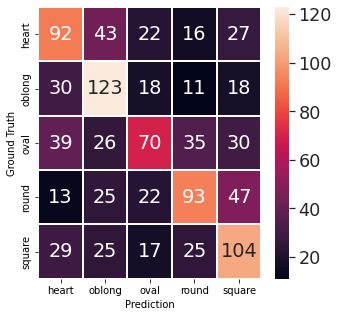

In [13]:
fig, ax = plt.subplots(figsize=(5,5))
cm = confusion_matrix(labelTest, yPred, labels=model.classes_)
sns.set(font_scale=1.6)
sns.heatmap(cm, linewidths=1, annot=True, ax=ax, fmt='g', 
            xticklabels=['heart', 'oblong', 'oval', 'round', 'square'],
            yticklabels=['heart', 'oblong', 'oval', 'round', 'square'],
            )
plt.xlabel('Prediction')
plt.ylabel('Ground Truth')

# KNN

In [14]:
model  = KNeighborsClassifier(n_neighbors=5)
model.fit(imageTrain, labelTrain)

KNeighborsClassifier()

In [15]:
yPred = model.predict(imageTest)
print("Test Accuracy:", accuracy_score(labelTest, yPred))

Test Accuracy: 0.349


In [16]:
print(classification_report(labelTest, yPred,target_names=['heart', 'oblong', 'oval', 'round', 'square']))

              precision    recall  f1-score   support

       heart       0.34      0.36      0.35       200
      oblong       0.44      0.34      0.38       200
        oval       0.29      0.37      0.32       200
       round       0.37      0.28      0.32       200
      square       0.35      0.40      0.37       200

    accuracy                           0.35      1000
   macro avg       0.36      0.35      0.35      1000
weighted avg       0.36      0.35      0.35      1000



Text(13.499999999999996, 0.5, 'Ground Truth')

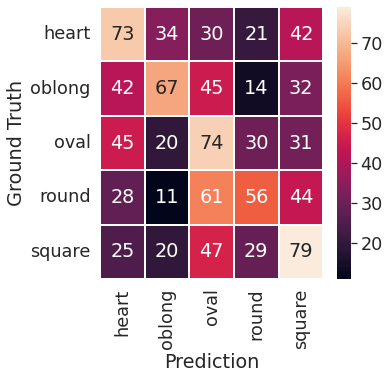

In [17]:
fig, ax = plt.subplots(figsize=(5,5))
cm = confusion_matrix(labelTest, yPred, labels=model.classes_)
sns.set(font_scale=1.6)
sns.heatmap(cm, linewidths=1, annot=True, ax=ax, fmt='g', 
            xticklabels=['heart', 'oblong', 'oval', 'round', 'square'],
            yticklabels=['heart', 'oblong', 'oval', 'round', 'square'],
            )
plt.xlabel('Prediction')
plt.ylabel('Ground Truth')